In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data=pd.read_csv('../../data/007/heart_failure_clinical_records_dataset.csv')
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [68]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [69]:
corr_mat=data.corr()

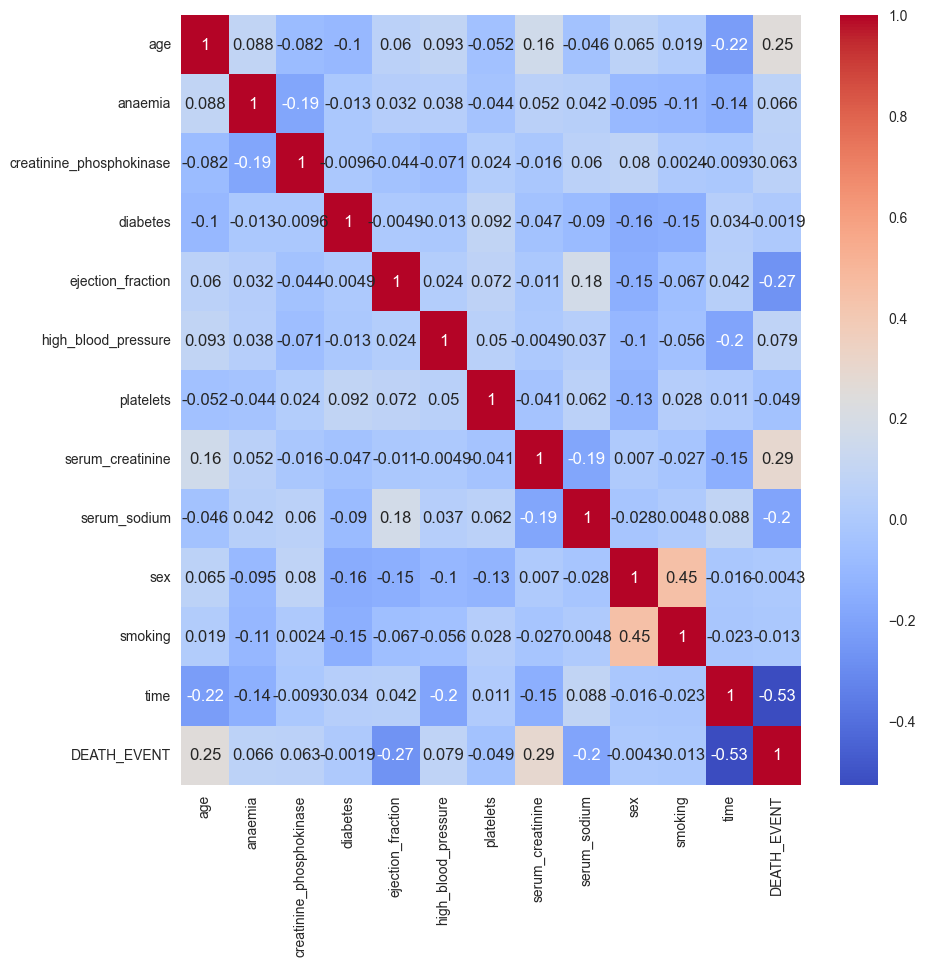

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,cmap="coolwarm",annot=True)
plt.show()

In [71]:
X=data.drop(['DEATH_EVENT'],axis=1)
y=data['DEATH_EVENT']

In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


<function matplotlib.pyplot.show(close=None, block=None)>

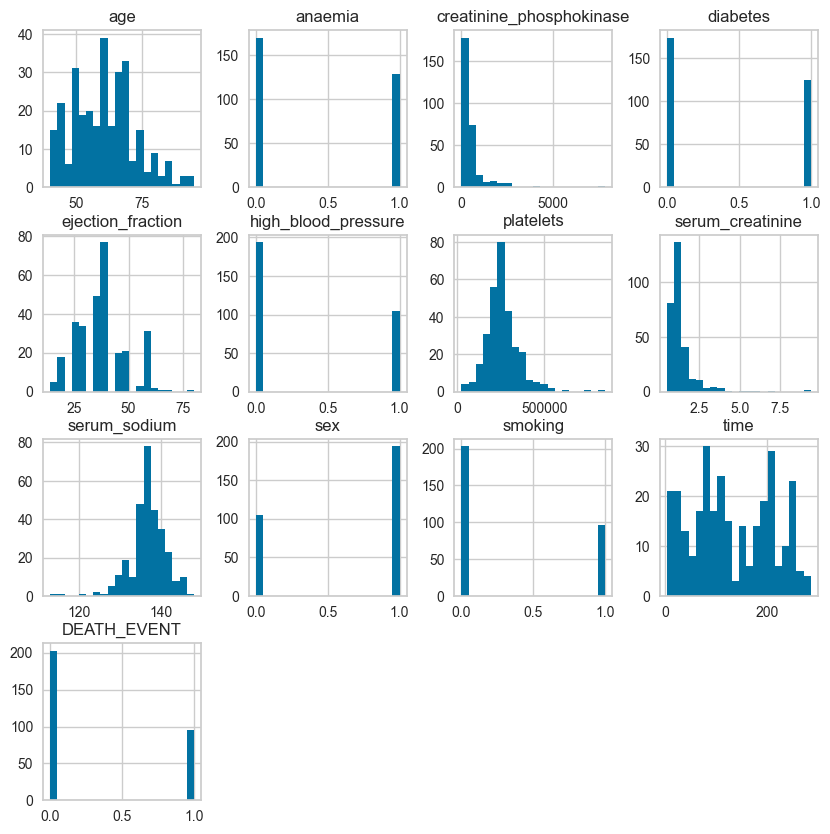

In [73]:
data.hist(column=data.columns,figsize=(10,10),bins=20)
plt.show

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [75]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509


In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [77]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [79]:
lr=LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report

y_pred=lr.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[34  1]
 [11 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60

Accuracy: 0.80


In [81]:
svc=SVC()
svc.fit(X_train_res,y_train_res)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [82]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report ,f1_score

y_pred=svc.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

Confusion Matrix:
[[28  7]
 [12 13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        35
           1       0.65      0.52      0.58        25

    accuracy                           0.68        60
   macro avg       0.68      0.66      0.66        60
weighted avg       0.68      0.68      0.68        60

Accuracy: 0.68
F1 score: 0.58


In [83]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [84]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report ,f1_score

y_pred=rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

Confusion Matrix:
[[33  2]
 [13 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

Accuracy: 0.75
F1 score: 0.62


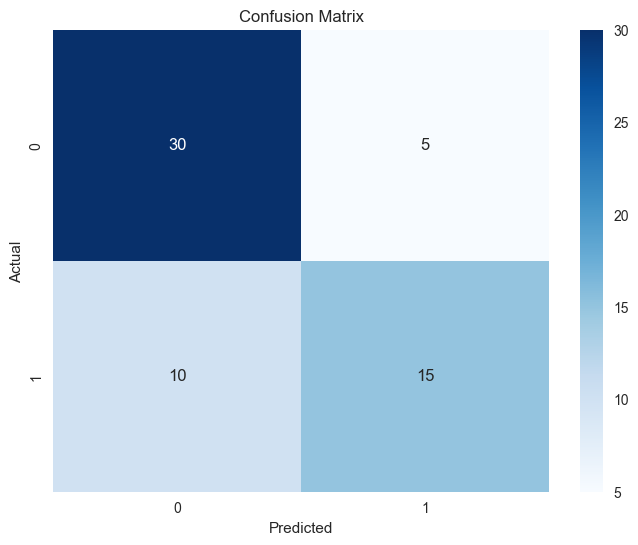

In [86]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [87]:
from pycaret.classification import *

In [88]:
y_train_res

0      1
1      1
2      1
3      0
4      1
      ..
331    1
332    1
333    1
334    1
335    1
Name: DEATH_EVENT, Length: 336, dtype: int64

In [89]:
s=setup(data=pd.concat([X_train,y_train], axis=1),target='DEATH_EVENT',preprocess=False)

,Description,Value
0,Session id,1277
1,Target,DEATH_EVENT
2,Target type,Binary
3,Original data shape,"(239, 13)"
4,Transformed data shape,"(239, 13)"
5,Transformed train set shape,"(167, 13)"
6,Transformed test set shape,"(72, 13)"
7,Numeric features,12


In [90]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8750,0.9133,0.7200,0.8705,0.7722,0.6891,0.7069,0.1310
et,Extra Trees Classifier,0.8570,0.9032,0.6400,0.8633,0.7210,0.6298,0.6515,0.1050
gbc,Gradient Boosting Classifier,0.8452,0.8683,0.7000,0.7955,0.7249,0.6215,0.6383,0.1040
ada,Ada Boost Classifier,0.8327,0.8089,0.6200,0.7917,0.6889,0.5772,0.5897,0.0630
lightgbm,Light Gradient Boosting Machine,0.8268,0.8659,0.6400,0.7467,0.6792,0.5638,0.5738,0.1340
xgboost,Extreme Gradient Boosting,0.8265,0.8836,0.6600,0.7383,0.6871,0.5699,0.5784,0.0830
dt,Decision Tree Classifier,0.7978,0.7405,0.6000,0.6711,0.5952,0.4823,0.5059,0.0220
lr,Logistic Regression,0.7776,0.8436,0.5400,0.6700,0.5860,0.4387,0.4503,1.2840
lda,Linear Discriminant Analysis,0.7776,0.8536,0.5600,0.6533,0.5888,0.4415,0.4515,0.0160
svm,SVM - Linear Kernel,0.7673,0.7648,0.5800,0.5967,0.5789,0.4294,0.4289,0.0160


In [91]:
# X_train_res.drop(['time'],axis=1,inplace=True)

In [92]:
s=setup(data=pd.concat([X_train_res,y_train_res], axis=1),target='DEATH_EVENT',preprocess=False)

,Description,Value
0,Session id,5175
1,Target,DEATH_EVENT
2,Target type,Binary
3,Original data shape,"(336, 13)"
4,Transformed data shape,"(336, 13)"
5,Transformed train set shape,"(235, 13)"
6,Transformed test set shape,"(101, 13)"
7,Numeric features,12


In [93]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8937,0.9430,0.8909,0.9016,0.8925,0.7878,0.7942,0.0830
et,Extra Trees Classifier,0.8935,0.9632,0.8902,0.9072,0.8910,0.7876,0.8000,0.0950
xgboost,Extreme Gradient Boosting,0.8933,0.9491,0.8826,0.9130,0.8917,0.7873,0.7962,0.0340
lightgbm,Light Gradient Boosting Machine,0.8850,0.9413,0.8826,0.8984,0.8842,0.7707,0.7805,0.0780
rf,Random Forest Classifier,0.8846,0.9541,0.8992,0.8846,0.8872,0.7702,0.7784,0.1390
ada,Ada Boost Classifier,0.8504,0.8954,0.8394,0.8679,0.8466,0.7017,0.7127,0.0600
lda,Linear Discriminant Analysis,0.8337,0.9055,0.8735,0.8214,0.8422,0.6682,0.6788,0.0120
ridge,Ridge Classifier,0.8295,0.9055,0.8652,0.8193,0.8373,0.6599,0.6699,0.0230
lr,Logistic Regression,0.8250,0.9016,0.8311,0.8295,0.8240,0.6507,0.6604,0.0200
dt,Decision Tree Classifier,0.8120,0.8125,0.8053,0.8202,0.8096,0.6244,0.6286,0.0140


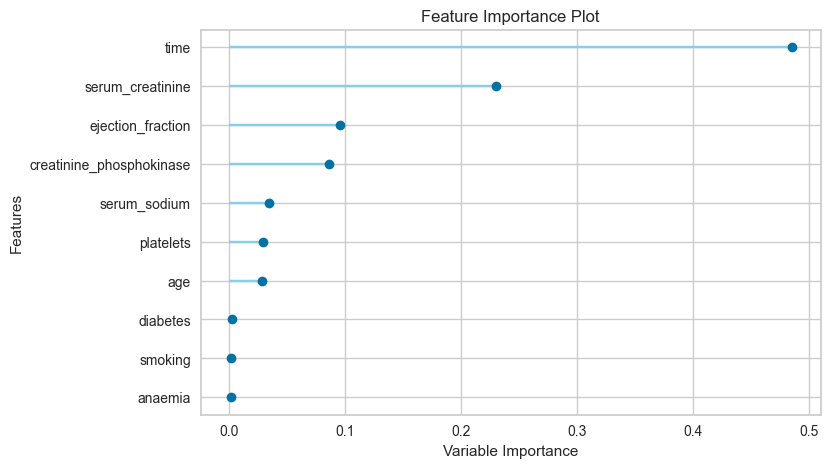

In [94]:
plot_model(best_model, plot='feature')

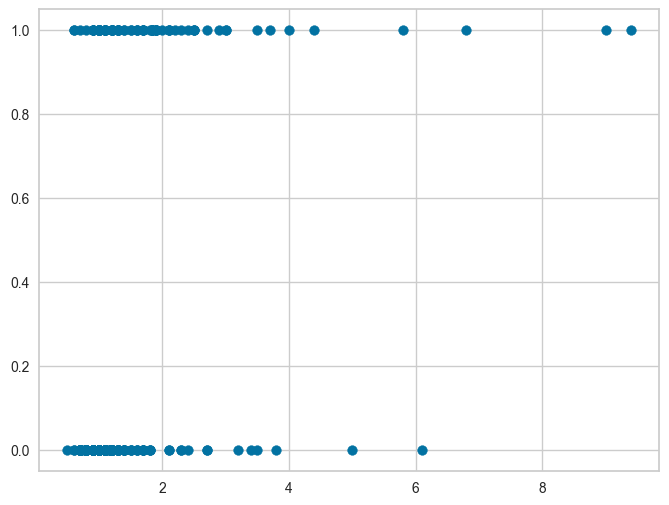

In [95]:
plt.figure(figsize=(8,6))
plt.scatter(x=data['serum_creatinine'],y=data['DEATH_EVENT'])
plt.show()

In [96]:
from lifelines import CoxPHFitter

In [97]:
cph = CoxPHFitter()
cph.fit(pd.concat([X_train_res,y_train_res], axis=1),duration_col='time', event_col='DEATH_EVENT')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 336 total observations, 168 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 336
number of events observed = 168
   partial log-likelihood = -840.34
         time fit was run = 2024-10-20 08:27:45 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
age                        0.55       1.73       0.09             0.38             0.71                 1.46                 2.04
anaemia                    0.24       1.27       0.08             0.08             0.40                 1.08                 1.50
creatinine_phosphokinase   0.13       1.14       0.08            -0.04             0.30                 0.97                 1.35
diabetes                   0.07       1.08       0.09            -0.10             0.24                 0.91                 1.28
ejection_fraction         -0.50       0.61       0.10            -0.69            -0.31                 0.50                 0.74
high_blood_pressure        0.24       1.27       0.08             0.08             0.40                 1.08                 1.49
platelets                 -0.08       0.92       0.09            -0.25             0.09                 0.78                 1.10
serum_creatinine           0.27       1.31       0.06             0.15             0.38                 1.16                 1.47
serum_sodium              -0.07       0.93       0.09            -0.25             0.10                 0.78                 1.10
sex                       -0.16       0.85       0.09            -0.35             0.03                 0.71                 1.03
smoking                    0.12       1.13       0.10            -0.07             0.31                 0.94                 1.36

                           cmp to     z      p   -log2(p)
covariate                                                
age                          0.00  6.39 <0.005      32.49
anaemia                      0.00  2.93 <0.005       8.19
creatinine_phosphokinase     0.00  1.55   0.12       3.03
diabetes                     0.00  0.84   0.40       1.32
ejection_fraction            0.00 -5.14 <0.005      21.82
high_blood_pressure          0.00  2.95 <0.005       8.32
platelets                    0.00 -0.89   0.37       1.42
serum_creatinine             0.00  4.49 <0.005      17.13
serum_sodium                 0.00 -0.84   0.40       1.32
sex                          0.00 -1.68   0.09       3.43
smoking                      0.00  1.26   0.21       2.27
---
Concordance = 0.70
Partial AIC = 1702.68
log-likelihood ratio test = 106.96 on 11 df
-log2(p) of ll-ratio test = 56.91

In [ ]:
['creatinine_phosphokinase','diabetes','platelets','serum_sodium','sex','smoking']

In [104]:
X_train_drop=X_train_res.drop(columns=['creatinine_phosphokinase','diabetes','platelets','serum_sodium','sex','smoking'],axis=1)
X_test_drop=X_test.drop(columns=['creatinine_phosphokinase','diabetes','platelets','serum_sodium','sex','smoking'],axis=1)

In [99]:
s=setup(data=pd.concat([X_train_drop,y_train_res], axis=1),target='DEATH_EVENT',preprocess=False)

,Description,Value
0,Session id,7279
1,Target,DEATH_EVENT
2,Target type,Binary
3,Original data shape,"(336, 7)"
4,Transformed data shape,"(336, 7)"
5,Transformed train set shape,"(235, 7)"
6,Transformed test set shape,"(101, 7)"
7,Numeric features,6


In [108]:
best_model_drop=compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:43:42
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9152,0.9415,0.9326,0.9050,0.9146,0.8301,0.8378,0.1240
rf,Random Forest Classifier,0.9111,0.9515,0.9152,0.9089,0.9090,0.8218,0.8272,0.1750
xgboost,Extreme Gradient Boosting,0.9065,0.9488,0.9144,0.9033,0.9063,0.8125,0.8170,0.0450
lightgbm,Light Gradient Boosting Machine,0.9065,0.9388,0.9159,0.9016,0.9062,0.8128,0.8171,0.0890
et,Extra Trees Classifier,0.9024,0.9589,0.9318,0.8820,0.9044,0.8047,0.8093,0.1960
ada,Ada Boost Classifier,0.8810,0.9446,0.8553,0.9025,0.8750,0.7614,0.7661,0.1110
knn,K Neighbors Classifier,0.8770,0.9134,0.8886,0.8666,0.8766,0.7535,0.7551,0.0320
lr,Logistic Regression,0.8388,0.8910,0.8303,0.8440,0.8348,0.6770,0.6801,0.0260
dt,Decision Tree Classifier,0.8339,0.8326,0.8182,0.8388,0.8237,0.6665,0.6731,0.0160
nb,Naive Bayes,0.8304,0.8766,0.7803,0.8632,0.8113,0.6607,0.6710,0.0120


In [109]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report ,f1_score

y_pred=best_model_drop.predict(X_test_drop)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

Confusion Matrix:
[[28  7]
 [10 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.68      0.60      0.64        25

    accuracy                           0.72        60
   macro avg       0.71      0.70      0.70        60
weighted avg       0.71      0.72      0.71        60

Accuracy: 0.72
F1 score: 0.64


In [117]:
s=setup(data=pd.concat([X_train_res,y_train_res], axis=1),target='DEATH_EVENT',preprocess=False)

,Description,Value
0,Session id,8640
1,Target,DEATH_EVENT
2,Target type,Binary
3,Original data shape,"(336, 13)"
4,Transformed data shape,"(336, 13)"
5,Transformed train set shape,"(235, 13)"
6,Transformed test set shape,"(101, 13)"
7,Numeric features,12


In [111]:
best_model_resampling=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9449,0.9856,0.9318,0.9609,0.9424,0.8898,0.8961,0.1140
rf,Random Forest Classifier,0.9192,0.9740,0.9235,0.9246,0.9198,0.8386,0.8463,0.1780
xgboost,Extreme Gradient Boosting,0.8982,0.9674,0.9152,0.8986,0.9005,0.7969,0.8083,0.0400
lightgbm,Light Gradient Boosting Machine,0.8980,0.9692,0.9068,0.9039,0.8992,0.7966,0.8076,0.0920
gbc,Gradient Boosting Classifier,0.8855,0.9724,0.8727,0.9101,0.8832,0.7714,0.7850,0.1320
dt,Decision Tree Classifier,0.8549,0.8557,0.8795,0.8480,0.8579,0.7103,0.7212,0.0140
ada,Ada Boost Classifier,0.8511,0.9047,0.8652,0.8603,0.8546,0.7036,0.7176,0.0740
lr,Logistic Regression,0.8380,0.9220,0.8477,0.8463,0.8379,0.6765,0.6906,0.0320
ridge,Ridge Classifier,0.8380,0.9279,0.8561,0.8380,0.8392,0.6761,0.6882,0.0160
lda,Linear Discriminant Analysis,0.8380,0.9279,0.8561,0.8380,0.8392,0.6761,0.6882,0.0140


In [113]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report ,f1_score

y_pred=best_model_resampling.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

Confusion Matrix:
[[30  5]
 [11 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        35
           1       0.74      0.56      0.64        25

    accuracy                           0.73        60
   macro avg       0.73      0.71      0.71        60
weighted avg       0.73      0.73      0.73        60

Accuracy: 0.73
F1 score: 0.64


In [118]:
s=setup(data=pd.concat([X_train,y_train], axis=1),target='DEATH_EVENT',preprocess=False)

,Description,Value
0,Session id,4585
1,Target,DEATH_EVENT
2,Target type,Binary
3,Original data shape,"(239, 13)"
4,Transformed data shape,"(239, 13)"
5,Transformed train set shape,"(167, 13)"
6,Transformed test set shape,"(72, 13)"
7,Numeric features,12


In [119]:
best_model_basic=compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:47:09
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8688,0.9367,0.7600,0.7867,0.7634,0.6745,0.6817,0.1330
lightgbm,Light Gradient Boosting Machine,0.8511,0.9062,0.7200,0.7805,0.7342,0.6335,0.6455,0.0910
et,Extra Trees Classifier,0.8382,0.8936,0.6000,0.8533,0.6681,0.5728,0.6063,0.1180
gbc,Gradient Boosting Classifier,0.8327,0.8926,0.7000,0.7321,0.7061,0.5916,0.5986,0.0900
lr,Logistic Regression,0.8324,0.8559,0.6400,0.7550,0.6582,0.5613,0.5846,0.0210
xgboost,Extreme Gradient Boosting,0.8272,0.9148,0.7200,0.7350,0.7090,0.5882,0.6040,0.0380
ridge,Ridge Classifier,0.8261,0.8659,0.6200,0.7502,0.6376,0.5413,0.5643,0.0160
lda,Linear Discriminant Analysis,0.8202,0.8642,0.6200,0.7302,0.6288,0.5280,0.5500,0.0130
ada,Ada Boost Classifier,0.8143,0.8694,0.5800,0.7567,0.6386,0.5215,0.5395,0.0620
svm,SVM - Linear Kernel,0.8140,0.8679,0.6600,0.7186,0.6608,0.5377,0.5574,0.0150


In [121]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report ,f1_score,roc_auc_score

y_pred=best_model_basic.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc=roc_auc_score(y_test,y_pred)
f1=f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")
print(f"AUC: {auc:.2f}")


Confusion Matrix:
[[33  2]
 [10 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60

Accuracy: 0.80
F1 score: 0.71
AUC: 0.77
